<a href="https://colab.research.google.com/github/ArturSidorenko/Python_MSE_Lectures/blob/main/Python_MSE_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ цен на активы в Pandas & Matplotlib

Библиотека Pnadas используется для исследования табличных данных. Основные черты Pnadas включают в себя:

- Структуры данных: Pandas обеспечивает две основные структуры данных - Series и DataFrame, которые могут хранить и обрабатывать табличные данные гибким и эффективным способом.

- Очистка и предварительная обработка данных: Pandas обеспечивает широкий спектр функций для очистки и предварительной обработки данных, таких как удаление и заполнение отсутствующих значений, удаление дубликатов и преобразование типов данных.

- Анализ данных: Pandas обеспечивает множество функций для анализа данных, таких как статистические сводки и группировка данных.

- Визуализация данных: Pandas интегрируется с другими библиотеками визуализации Python, такими как Matplotlib и Seaborn, для предоставления простых в использовании функций для создания визуализаций данных.


Библиотека Matplotlib используется для создания графиков и диаграмм.


Откуда брать данные? Их могут предоставить Вам, например, в csv файле. В Pandas есть функция для загрузки таблицы из csv файла. Но данные цен биткоина придется брать саммим. Для этого нужен API ресурса, который предоставляет такие сведения. API --- это способ взаимодействия с ресурсом при помощи программы, а не интерфейса (сайта). Примеры:
- Coinbase
- Yahoo Finance
- Binance

API обычно платные, бесплатные версии имеют урезанный функционал, например, не дают цен "вот прямо сейчас", только исторические. С этми будет сложно извлекать прибыль, но можно познакомиться с API.

Внимание! Если Вы выполняете код на локальной машине, не забудьте установить все необходимые библиотеки перд их использованием. Можно использовать такие установщики, как conda и pip.

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd # для данных
import numpy as np # numpy
import yfinance as yf # чтобы скачивать с Yahoo Finance
import matplotlib.pyplot as plt # для графиков

# Download historical price data for BTC-USD
df = yf.download('BTC-USD', start='2019-01-01', end='2023-03-27')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df # df --- стандартное название базы данных в Pandas

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,27307.437500,33382021890
2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,28333.972656,24220433689
2023-03-24,28324.111328,28388.437500,27039.265625,27493.285156,27493.285156,25980310960


In [ ]:
df['Close'] # одна колонка Close

Date
2019-01-01     3843.520020
2019-01-02     3943.409424
2019-01-03     3836.741211
2019-01-04     3857.717529
2019-01-05     3845.194580
                  ...     
2023-03-22    27307.437500
2023-03-23    28333.972656
2023-03-24    27493.285156
2023-03-25    27494.707031
2023-03-26    27994.330078
Name: Close, Length: 1546, dtype: float64

In [ ]:
# Calculate basic statistics of BTC price data
mean_price = df['Close'].mean()
median_price = df['Close'].median()
std_price = df['Close'].std()
min_price = df['Close'].min()
max_price = df['Close'].max()
print(f"mean price = {mean_price}\nmedian price = {median_price}\nmin_price = {min_price}\nmax_price = {max_price}\nstd_price = {std_price}")

mean price = 23476.18012161551
median price = 18853.6279296875
min_price = 3399.4716796875
max_price = 67566.828125
std_price = 17081.603569051986


А теперь сделаем график

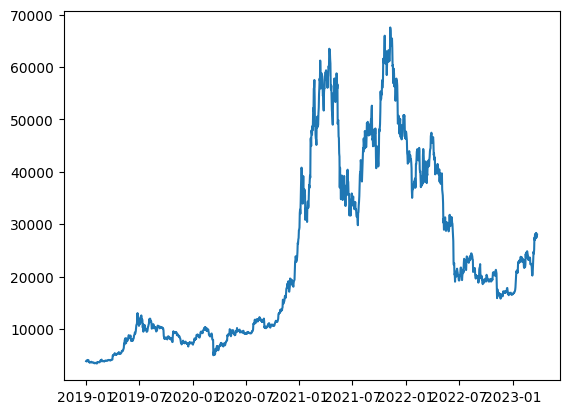

In [ ]:
plt.plot(df['Close']) # Включаем matplotlib

Он не очень красивый. Сделаем несколько улучшений:

- увеличенный размер
- заголовок
- подписи по осям
- читаемые отметки на осях
- легенда

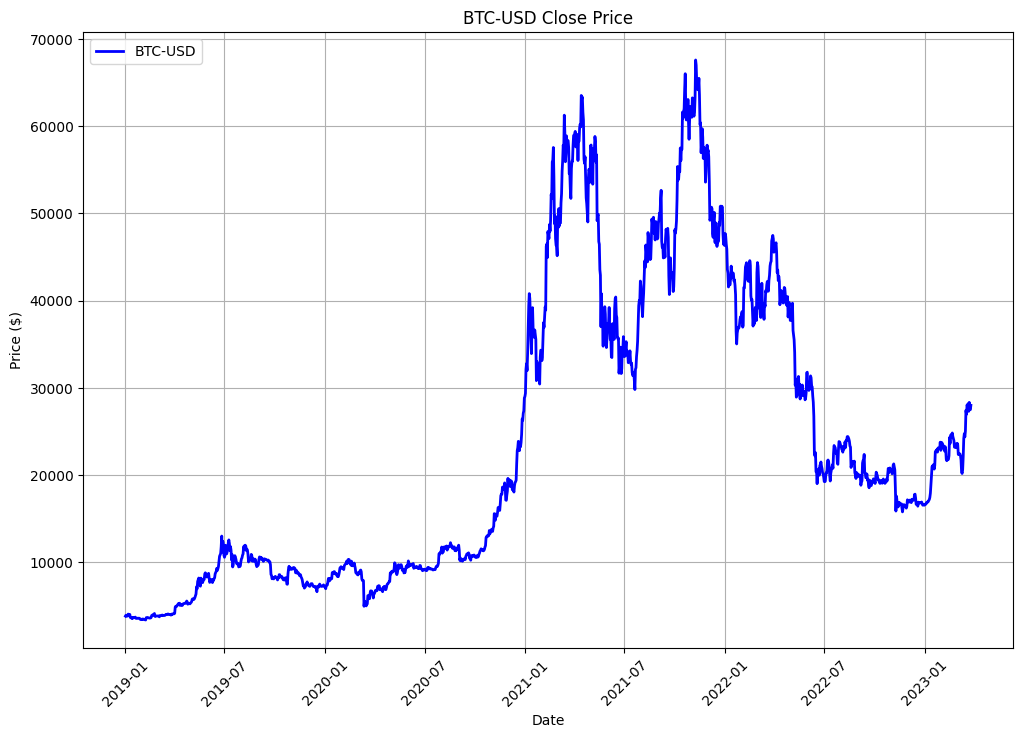

In [ ]:

# Set figure size and title
plt.figure(figsize=(12, 8)) # большой размер графика
plt.title('BTC-USD Close Price') # заголовок графика

# Plot the data
plt.plot(df['Close'], color='blue', linewidth=2) # синяя линия такой-то ширины

# Set x and y axis labels and tick marks
plt.xlabel('Date') # отметка на оси x (абсциссы) Date
plt.ylabel('Price ($)') # отметка на оси y (ординаты) Price ($)
plt.xticks(fontsize=10, rotation=45) # поворачиваем наши даты на 45 градусов, чтобы вместились
plt.yticks(fontsize=10) # задаем шрифт для отметок по оси

# Add gridlines and legend
plt.grid(True) # добавить сеточку
plt.legend(['BTC-USD'], loc='upper left') # добавить легенду

# Show the plot
# plt.savefig('drive/MyDrive/figure.pdf') # save the figure on Google Drive
plt.show() # финальная команда запуска

## Тренд
Попробуем уловить тренды в изменении цены. Самый распространенный метод --- скользящее среднее (moving average). Если скользящее среднее растет --- есть растущий тренд, убывает --- наоборот.

In [ ]:
# Calculate the 30-day moving average (for ordinary stocks month = 22 days)
ma = df['Close'].rolling(window=30).mean()

In [ ]:
ma.tail() # последние 5 чисел

Date
2023-03-22    23907.225130
2023-03-23    24037.145768
2023-03-24    24147.293815
2023-03-25    24265.534310
2023-03-26    24425.407747
Name: Close, dtype: float64

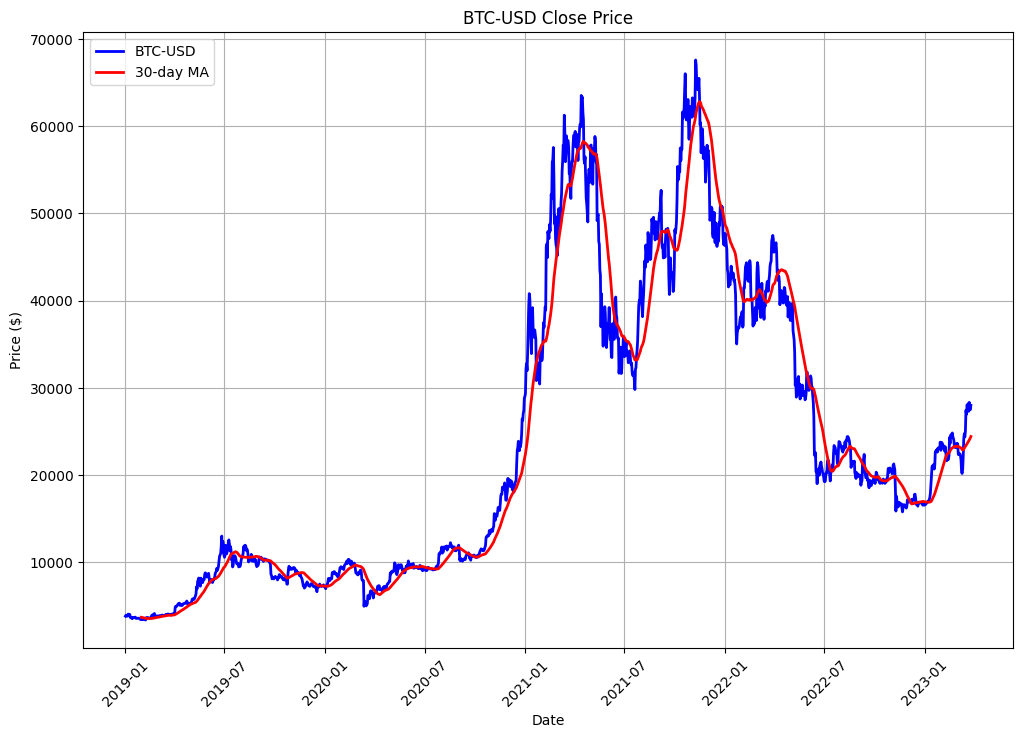

In [ ]:
# Set figure size and title
plt.figure(figsize=(12, 8))
plt.title('BTC-USD Close Price')

# Plot the data
plt.plot(df['Close'], color='blue', label='BTC-USD', linewidth=2)
plt.plot(ma, color='red', label='30-day MA', linewidth=2)

# Set x and y axis labels and tick marks
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Add gridlines and legend
plt.grid(True)
plt.legend(loc='upper left')

# Show the plot
plt.show()

Более продвинутые методы используют различные технические индикаторы, машинное обучение, анализ новостей и т.д. Попробуем применить полосы Боллинджера

In [ ]:
df.loc['2020-01-01'] # посмотреть, какие цены были 1 января 2020

Open         7.194892e+03
High         7.254331e+03
Low          7.174944e+03
Close        7.200174e+03
Adj Close    7.200174e+03
Volume       1.856566e+10
Name: 2020-01-01 00:00:00, dtype: float64

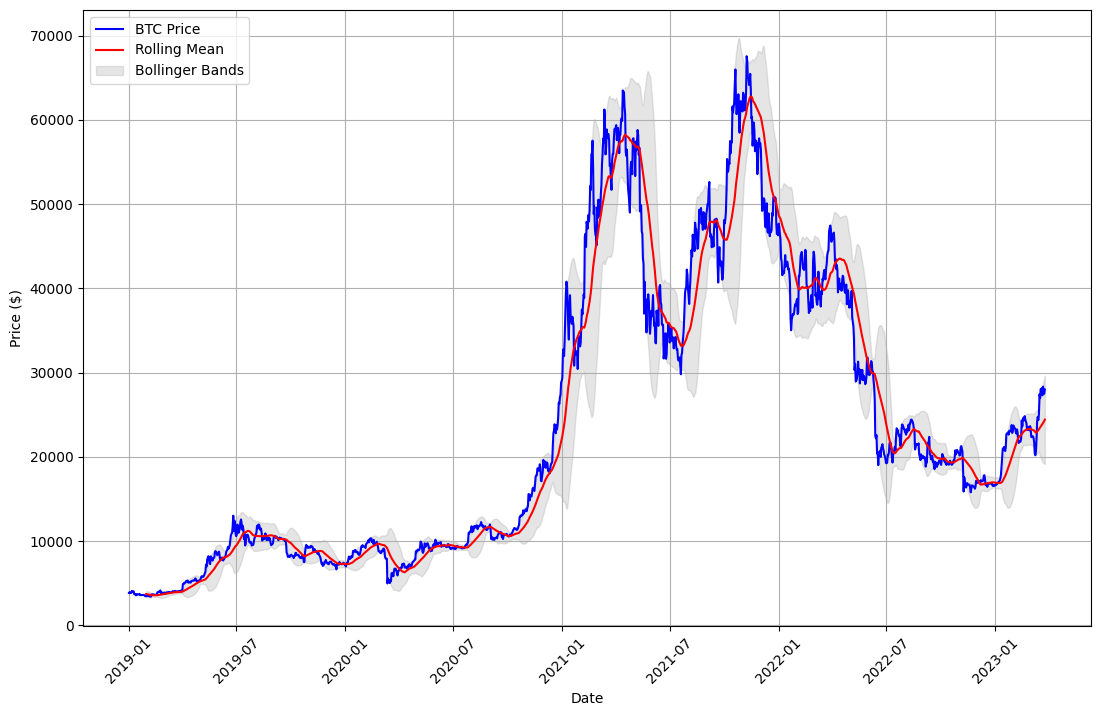

In [ ]:
# Calculate the rolling mean and standard deviation of the closing price
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

# Calculate the upper and lower Bollinger Bands
upper_band = rolling_mean + (2 * rolling_std) # верхняя полоса
lower_band = rolling_mean - (2 * rolling_std) # нижняя полоса

# Plot the BTC price data with Bollinger Bands
# index is the date here
fig, ax = plt.subplots(figsize=(13, 8)) # более сложный путь через подграфики
ax.plot(df.index, df['Close'], label='BTC Price', color='blue') # цена закрытия
ax.plot(rolling_mean.index, rolling_mean, label='Rolling Mean', color='red') # скользящее среднее
ax.fill_between(upper_band.index, upper_band, lower_band, color='gray', alpha=0.2, label='Bollinger Bands') # серая область между полосами, прозрачность alhpha

ax.legend(loc='upper left')
# Set x and y axis labels and tick marks
plt.xlabel('Date', axes=ax)
plt.ylabel('Price ($)', axes=ax)
plt.xticks(fontsize=10, rotation=45, axes=ax)
plt.yticks(fontsize=10, axes=ax)
plt.grid(True)

plt.show()

Попробуйте сами нарисовать полосы Боллинджера для фрагмента графика, начинающегося с января 2023 года, обрезав исходный DataFrame

In [ ]:
selected_date = '2022-10-01'
mask = (df.index >= pd.Timestamp(selected_date)) # маска

df_short = df[mask]
df_short['Close']

Date
2022-10-01    19312.095703
2022-10-02    19044.107422
2022-10-03    19623.580078
2022-10-04    20336.843750
2022-10-05    20160.716797
                  ...     
2023-03-22    27307.437500
2023-03-23    28333.972656
2023-03-24    27493.285156
2023-03-25    27494.707031
2023-03-26    27994.330078
Name: Close, Length: 177, dtype: float64

In [ ]:
mask # сама маска --- массив из True / False

array([False, False, False, ...,  True,  True,  True])

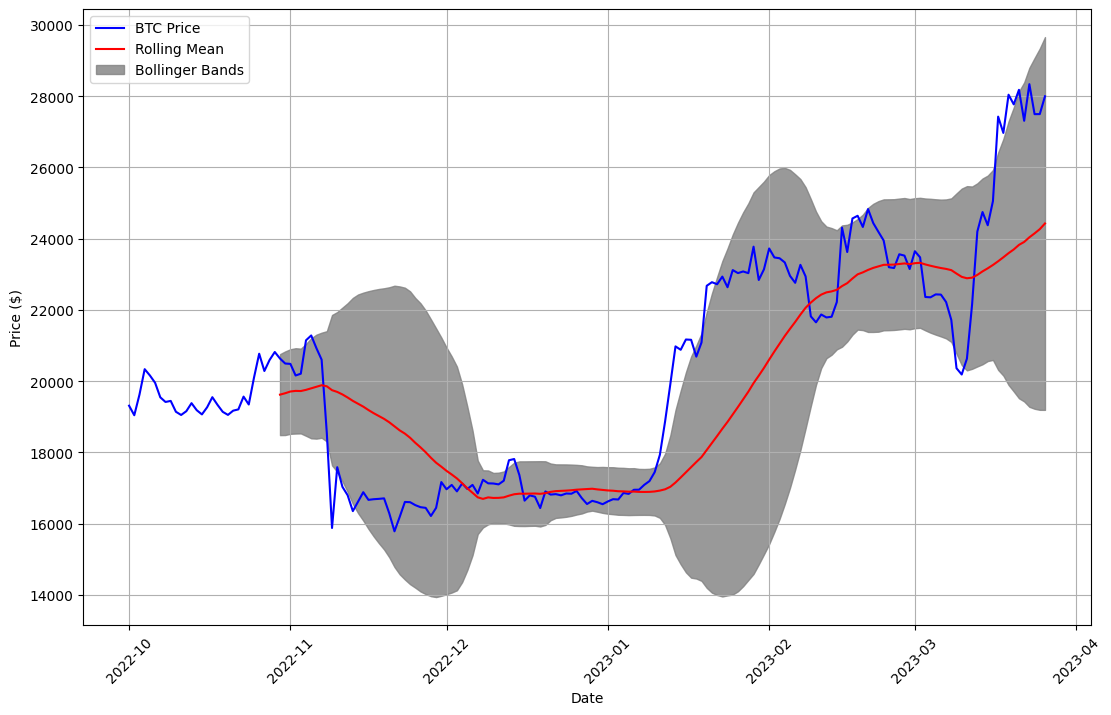

In [ ]:
# Calculate the rolling mean and standard deviation of the closing price
rolling_mean = df_short['Close'].rolling(window=30).mean()
rolling_std = df_short['Close'].rolling(window=30).std()

# Calculate the upper and lower Bollinger Bands
upper_band = rolling_mean + (2 * rolling_std)
lower_band = rolling_mean - (2 * rolling_std)

# Plot the BTC price data with Bollinger Bands
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(df_short.index, df_short['Close'], label='BTC Price', color='blue')
ax.plot(rolling_mean.index, rolling_mean, label='Rolling Mean', color='red')
ax.fill_between(upper_band.index, upper_band, lower_band, color='grey', alpha=0.8, label='Bollinger Bands')

ax.legend(loc='upper left')
# Set x and y axis labels and tick marks
plt.xlabel('Date', axes=ax)
plt.ylabel('Price ($)', axes=ax)
plt.xticks(fontsize=10, rotation=45, axes=ax)
plt.yticks(fontsize=10, axes=ax)
plt.grid(True)

plt.show()

## Сравнение двух цен

Попробуем сравнить цены на BTC и индекс технологических фирм NASDAQ.

Вначале нарисуем совместные графики.

In [ ]:
# Download historical price data for BTC-USD and NASDAQ
btc = yf.download('BTC-USD', start='2019-01-01', end='2023-03-24')
nasdaq = yf.download('^IXIC', start='2019-01-01', end='2023-03-24')

# Select the 'Close' price column
btc_close = btc['Close']
nasdaq_close = nasdaq['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Не рабоатет: массивы разной длины. Наверное, NASDAQ не торгуется на выходных. Попробуем сделать так, чтобы обы массива данных были одной длины. Для этого из массива для btc удалим дни, которых нет в NASDAQ, и наоборот. Есть прекрасая функция concat в Pandas, которая позволяет по-умному сложить два массива данных вместе с учетом различия в расзмерах.

In [ ]:
# Align the two arrays based on their dates
combined_df = pd.concat([btc_close, nasdaq_close], axis=1, join='inner') # сделай нам таблицу с двумя рядами по тем дням, которые есть в обоих рядах
btc_close = combined_df.iloc[:,0] # выделяем колонку с ценами на btc
nasdaq_close = combined_df.iloc[:,1] # выделяем колонку с ценами на nasdaq

# Calculate the correlation coefficient using NumPy's corrcoef function
correlation = np.corrcoef(btc_close, nasdaq_close)[0,1]

print('Correlation between BTC and NASDAQ prices:', correlation)

Correlation between BTC and NASDAQ prices: 0.8979169471340944


In [ ]:
btc_close.describe() # описательные статистики

count     1064.000000
mean     23498.047654
std      17118.876074
min       3399.471680
25%       9268.461670
50%      18820.333008
75%      38146.476562
max      67566.828125
Name: Close, dtype: float64

<Axes: >

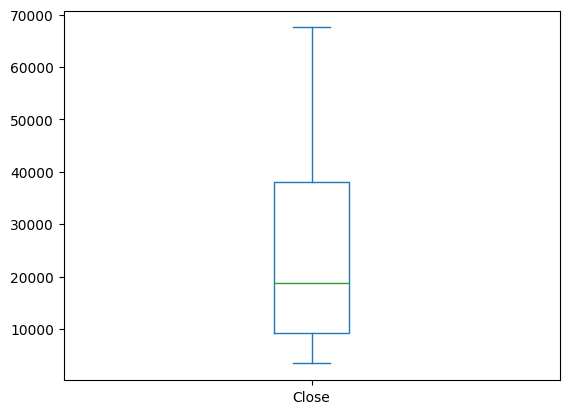

In [ ]:
btc_close.plot.box() # ящик с усами

In [ ]:
combined_df.head()

,Close,Close
Date,,
2019-01-02,3943.409424,6665.939941
2019-01-03,3836.741211,6463.500000
2019-01-04,3857.717529,6738.859863
2019-01-07,4025.248291,6823.470215
2019-01-08,4030.847900,6897.000000


Корреляция высокая. Попробуем изобразить временные ряды на графике.

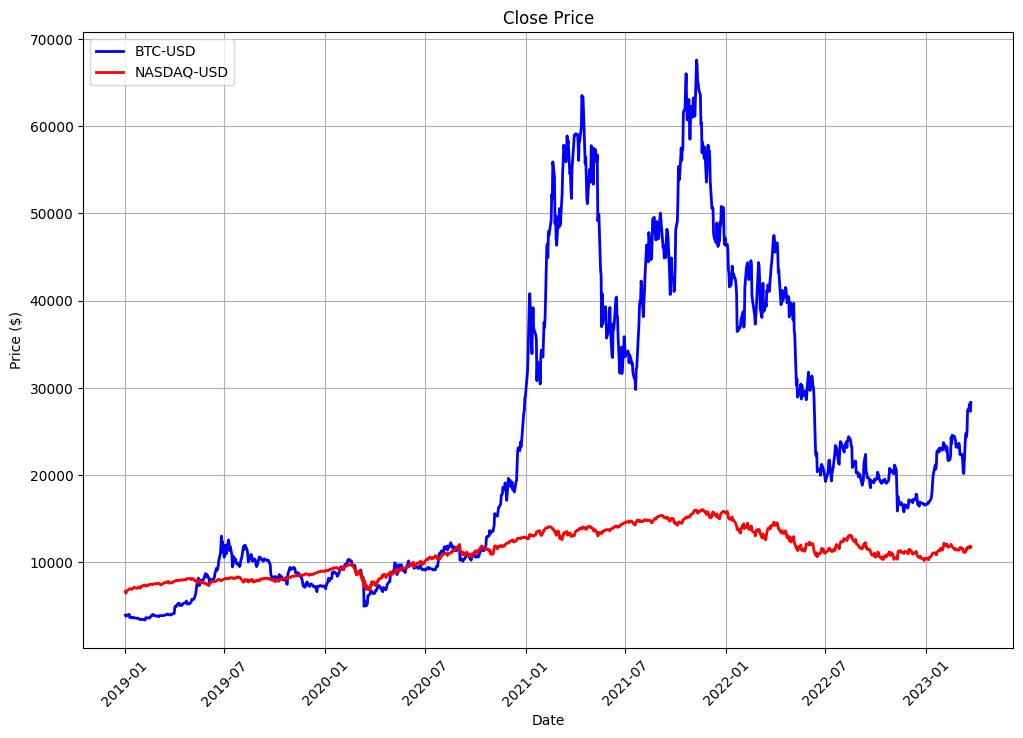

In [ ]:
# Set figure size and title
plt.figure(figsize=(12, 8))
plt.title('Close Price')

# Plot the data
plt.plot(btc_close, color='blue', label='BTC-USD', linewidth=2)
plt.plot(nasdaq_close, color='red', label='NASDAQ-USD', linewidth=2)

# Set x and y axis labels and tick marks
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Add gridlines and legend
plt.grid(True)
plt.legend(loc='upper left')

# Show the plot
plt.show()

Теперь используем scatter plot, чтобы изобразить найденную корреляцию.

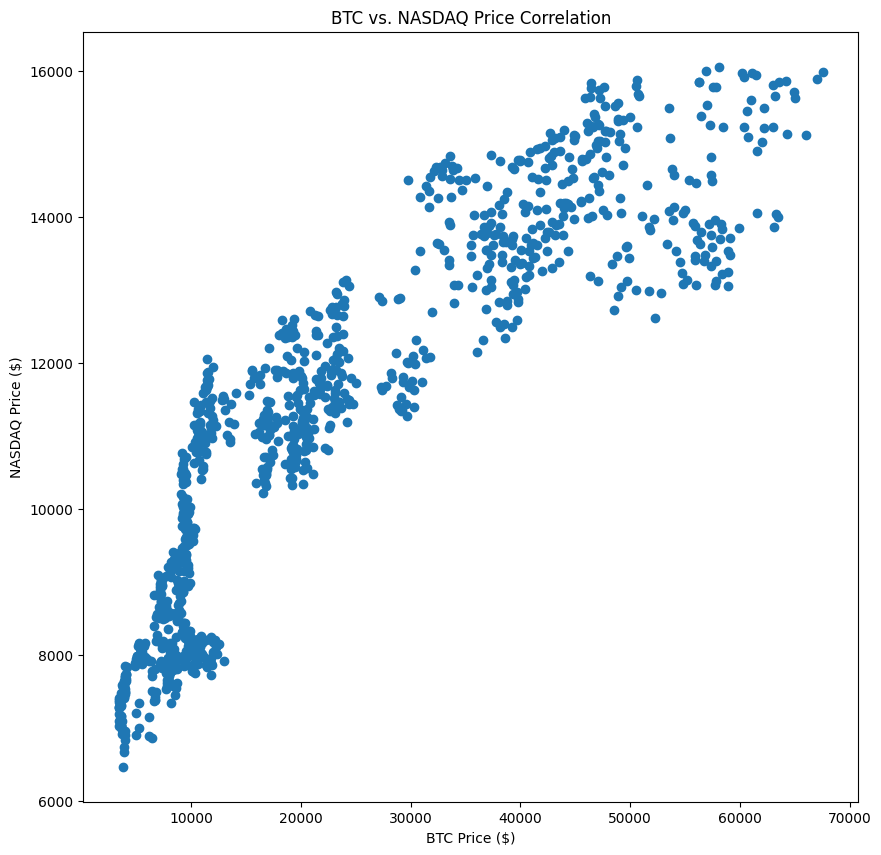

In [ ]:
# Create a scatter plot of the BTC and NASDAQ prices
plt.figure(figsize=(10,10))
plt.scatter(btc_close, nasdaq_close)

# Set the x and y axis labels and the plot title
plt.xlabel('BTC Price ($)')
plt.ylabel('NASDAQ Price ($)')
plt.title('BTC vs. NASDAQ Price Correlation')


# Show the plot
plt.show()

**Задача для проекта** Сделайте плюс-минус ту же аналитику, что и выше. При желании используйте не Close price, а Adjusted Close price. Сделайте ее в отдельном блокноте. Вместо доходностей BTC-NASDAQ вы можте использовать доходности любой другой пары тикеров.
- Графики для цен с полосами Боллинджера для выбранного Вами промежутка
- Ящик с усами
- scatter-plot (диаграмма рассеяния)
